In [1]:
import sys
import time
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter

In [2]:
DCT = pd.read_excel("Raw_Results/RESULTS_IEEE14_ClassifiersTest_Imbalanced_DCT.xlsx")
GNB = pd.read_excel("Raw_Results/RESULTS_IEEE14_ClassifiersTest_Imbalanced_GNB.xlsx")
KNN = pd.read_excel("Raw_Results/RESULTS_IEEE14_ClassifiersTest_Imbalanced_KNN.xlsx")

In [3]:
imbalanceRange = np.arange(0.1,1.0,0.1)
print(imbalanceRange)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [4]:
DCT = []
GNB = []
KNN = []
MM = []

for i in imbalanceRange:
    DCT.append( pd.read_excel("Raw_Results/RESULTS_IEEE14_ClassifiersTest_Imbalanced_DCT.xlsx", sheet_name = "Imb {}".format(i)) )
    GNB.append( pd.read_excel("Raw_Results/RESULTS_IEEE14_ClassifiersTest_Imbalanced_GNB.xlsx", sheet_name = "Imb {}".format(i)) )
    KNN.append( pd.read_excel("Raw_Results/RESULTS_IEEE14_ClassifiersTest_Imbalanced_KNN.xlsx", sheet_name = "Imb {}".format(i)) )
    MM.append ( pd.read_excel("Raw_Results/RESULTS_IEEE14_MainModels_Imbalanced_100Epochs.xlsx", sheet_name = "Imb {}".format(i)) )

In [5]:
DCT[0].head()

,Unnamed: 0,Sparsity,Accuracy,F1 score,Precision,Recall,False Positive Rate
0,0,0.1,0.7145,0.751847,0.664873,0.865,0.436
1,1,0.2,0.6950,0.748557,0.636746,0.908,0.518
2,2,0.3,0.9345,0.934858,0.929773,0.940,0.071
3,3,0.4,0.8730,0.882080,0.823224,0.950,0.204
4,4,0.5,0.9175,0.920174,0.891284,0.951,0.116


In [6]:
d1 = DCT[0]
d1['Accuracy']

0    0.7145
1    0.6950
2    0.9345
3    0.8730
4    0.9175
5    0.9455
6    0.9625
7    0.9715
8    0.9770
9    0.9725
Name: Accuracy, dtype: float64

In [7]:
dct_acc = []
gnb_acc = []
knn_acc = []
ann_acc = []
gdnn_acc = []

for i in range(9):
    dct = DCT[i]
    gnb = GNB[i]
    knn = KNN[i]
    ann = MM[i]
    
    dct_acc.append( np.mean(dct['Accuracy']) )
    gnb_acc.append( np.mean(gnb['Accuracy']) )
    knn_acc.append( np.mean(knn['Accuracy']) )
    ann_acc.append( np.mean(ann['Model 1'])  ) 
    gdnn_acc.append( np.mean(ann['Model 7'])  )

In [8]:
print(dct_acc)
print(gnb_acc)
print(knn_acc)
print(ann_acc)
print(gdnn_acc)

[0.89635, 0.88545, 0.8612, 0.8667499999999999, 0.8397, 0.8056999999999999, 0.8101, 0.80885, 0.82485]
[0.8554499999999999, 0.8795999999999999, 0.89075, 0.8899500000000001, 0.8835, 0.88055, 0.8789, 0.8775499999999999, 0.8736499999999999]
[0.5, 0.50065, 0.5043499999999999, 0.5115000000000001, 0.5240499999999999, 0.53455, 0.54525, 0.5605, 0.5795]
[0.5, 0.6140500068664551, 0.5, 0.5, 0.8247500002384186, 0.5, 0.8918999969959259, 0.9074500143527985, 0.8858499944210052]
[0.9218999981880188, 0.8910000026226044, 0.953549998998642, 0.9526499927043914, 0.9637499868869781, 0.9514500021934509, 0.9624500036239624, 0.9697000086307526, 0.9592999994754792]


In [9]:
x=np.arange(0.1,1,0.1)
x=x/2
print(x)

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45]


## Plotting

In [10]:
SMALL_SIZE = 14
MEDIUM_SIZE = 20
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
title_font = {'fontname':'Arial', 'size':'26', 'color':'black', 'weight':'bold',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

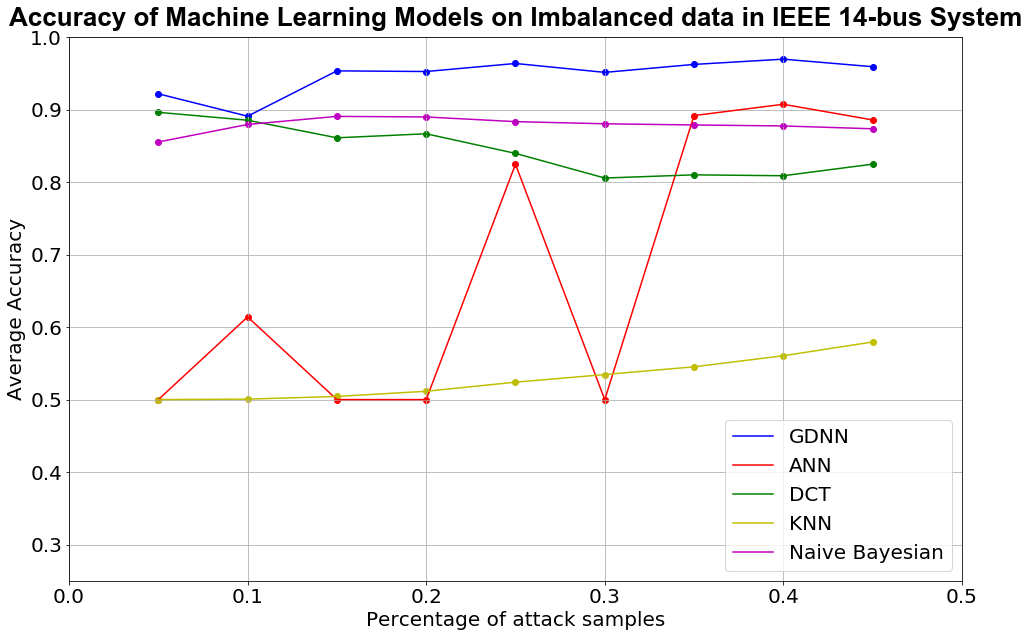

In [11]:
plt.figure(figsize=(16,10))
plt.scatter(x,gdnn_acc, color = 'b')
plt.plot(x,gdnn_acc, 'b-', label="GDNN")

plt.scatter(x,ann_acc, color = 'r')
plt.plot(x,ann_acc, 'r-', label="ANN")

plt.scatter(x,dct_acc, color = 'g')
plt.plot(x,dct_acc, 'g-', label="DCT")

plt.scatter(x,knn_acc, color = 'y')
plt.plot(x,knn_acc, 'y-', label="KNN")

plt.scatter(x,gnb_acc, color = 'm')
plt.plot(x,gnb_acc, 'm-', label="Naive Bayesian")

plt.ylabel('Average Accuracy')
plt.xlabel('Percentage of attack samples')
plt.legend(loc="lower right")
plt.title('Accuracy of Machine Learning Models on Imbalanced data in IEEE 14-bus System', **title_font)
plt.grid()
plt.axis([0,0.5,0.25,1])

plt.savefig('IEEE14_ImbalancedAccuracies.png')

plt.show()